## Exploratory Data Analysis in Python

**Course Structure:**
* Chapter 1. Getting to Know a Dataset
* Chapter 2. Data Cleaning and Imputation
* Chapter 3. Relations in Data
* Chapter 4. Turning Exploratory Analysis Into Action

### CHAPTER 1. Getting to Know a Dataset

#### Part 1.1 Initial exploration

**Exploratory Data Analysis (EDA):**
* The process of **reviewing and cleaning data** to **derive insights** and **generate hypothesis** 
* Prepare data for use in a machine learning model
* Use *'.head()'* to get a first look at the data
* Use *'.info()'* to gather more information
* Use *'.value_counts()'* to look at categorical columns
* Use *'.describe()'* to look at numerical columns
* Use *'seaborn'* and *'matplotlib.pyplot'* library to visualize data

In [1]:
# Code for part 1.1

# functions for initial exploration
import pandas as pd

# get the data
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')

# print the first five rows
print(unemployment.head())

# print summary of non-missing values and data types
print(unemployment.info())

# print summary statistics for numerical columns
print(unemployment.describe())

# count the values associated with each continent
print(unemployment['continent'].value_counts())


  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  D

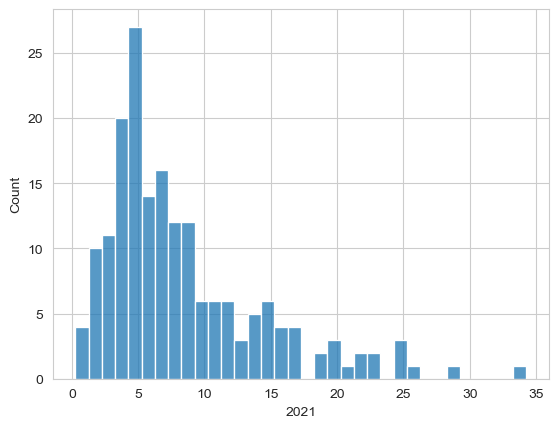

In [2]:
# Code for part 1.1 (continue)

# global unemployment in 2021
import seaborn as sns
import matplotlib.pyplot as plt

# create a histogram of 2021 unemployment
sns.histplot(data=unemployment, x="2021",binwidth=1)
plt.show()


#### Part 1.2 Data validation

* An early step in EDA
* Verify whether **data types and ranges** are as expected
* Use *'.dtypes'* to look at data types
* Use *'.astype()'* to change data types
* Use *'.isin()'* to validate categorical data
* Use *'.min(), .max()'* and *sns.boxplot()* to validate numerical data

In [3]:
# Code for part 1.2

# get the data
import pandas as pd
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')

# detecting data types
print(unemployment.dtypes)

# validating continents whether it is outside Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])
print(unemployment[not_oceania])


country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object
    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
17

0.26 33.56


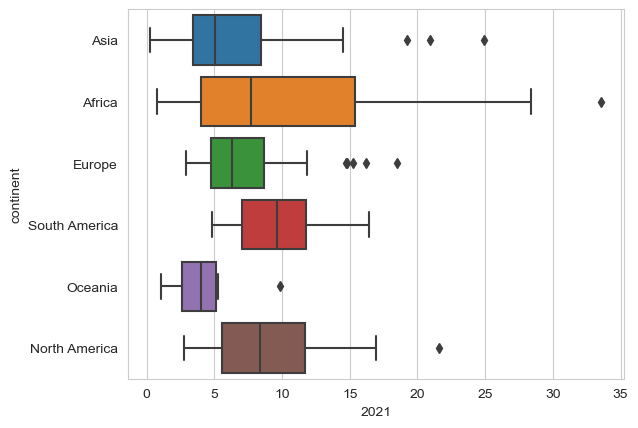

In [4]:
# Code for part 1.2 (continue)

# validating range
import seaborn as sns
import matplotlib.pyplot as plt

# print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=unemployment, x="2021", y="continent")
plt.show()

#### Part 1.3 Data summarization

* Use *'.groupby()'* to explore groups of data
* And use chained aggregated functions to summarize grouped data
* Aggregating functions:
    * Sum: *'.sum()'*
    * Count: *'.count()'*
    * Minimum: *'.min()'*
    * Maximum: *'.max()'*
    * Variance: *'.var()'*
    * Standard deviation: *'.std()'*
* Use *'.agg()'* applies aggregating functions across a DataFrame (ungrouped data)
* You can even **specify aggregations for columns** and **name summary columns**
* Use *'sns.barplot()'* to visualize categorical summaries

In [5]:
# Code for part 1.3

# summaries with .groupby() and .agg()
import pandas as pd

# get the data
unemployment = pd.read_csv('12_datasets/clean_unemployment.csv')
# print(unemployment.info())

# keep numeric columns only
unemployment_num = unemployment.select_dtypes('float64')
# print(unemployment_num.info())

# print the mean and standard deviation of rates by year
print(unemployment_num.agg(['mean', 'std']))

# remove other categorical columns except 'continent'
unemployment_continent = unemployment.drop(['country_code', 'country_name'], axis=1)

# print the mean and standard deviation of rates by year by each continent
print(unemployment_continent.groupby('continent').agg(['mean', 'std']))

          2010      2011      2012      2013      2014      2015      2016  \
mean  8.409286  8.315440  8.317967  8.344780  8.179670  8.058901  7.925879   
std   6.248887  6.266795  6.367270  6.416041  6.284241  6.161170  6.045439   

          2017      2018      2019      2020      2021  
mean  7.668626  7.426429  7.243736  8.420934  8.390879  
std   5.902152  5.818915  5.696573  6.040915  6.067192  
                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721

In [6]:
# Code for part 1.3 (continue)

# named aggregations
continent_summary = unemployment_continent.groupby('continent').agg(
    mean_rate_2021 = ('2021', 'mean'),
    std_rate_2021 = ('2021', 'std')
)
print(continent_summary)


               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


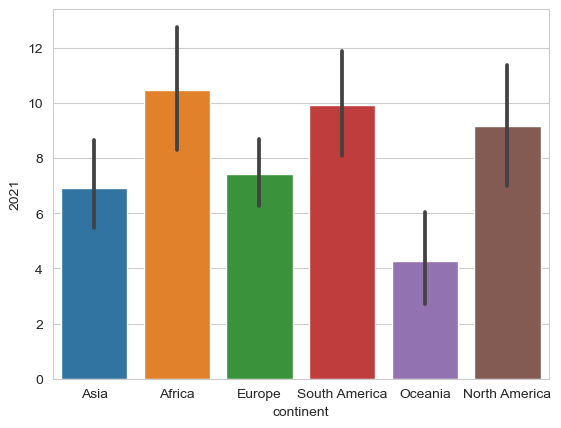

In [7]:
# Code for part 1.3 (continue)

# visualize categorical summaries
import seaborn as sns
import matplotlib.pyplot as plt

# create a bar plot of continents and their average unemployment rate
sns.barplot(data=unemployment, x='continent', y='2021')
plt.show()

### CHAPTER 2. Data Cleaning and Imputation

#### Part 2.1 Addressing missing data

**Missing data a problem?**
* Affects distributions
* Less representative of the population
* Can result in draw wrong conclusions
* Use *'.isna().sum()'* to check missing data in a DataFrame

**Dealing with missing data:**
1. Drop missing values (when 5% or less of total values)
    * Use *'.dropna()'* to drop missing values
2. Impute mean, median, mode (depends on distribution and context)
    * Use *'.fillna()'* to impute missing values
3. Impute by subgroup
    * Use *'.fillna(.map())'* to configure the mapping strategy in subgroups

In [8]:
# Code for part 2.1

# dealing with missing data
import pandas as pd

# get the data
planes = pd.read_csv('12_datasets/planes.csv')
# print(planes.head())

# print the number of missing values in each column
print(planes.isna().sum())

# find the threshold (5%)
threshold = len(planes) * 0.05

# create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
# print(cols_to_drop)

# drop missing values with filter
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())

# the remaining columns have missing values are: 'Additional_Info' and 'Price'

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


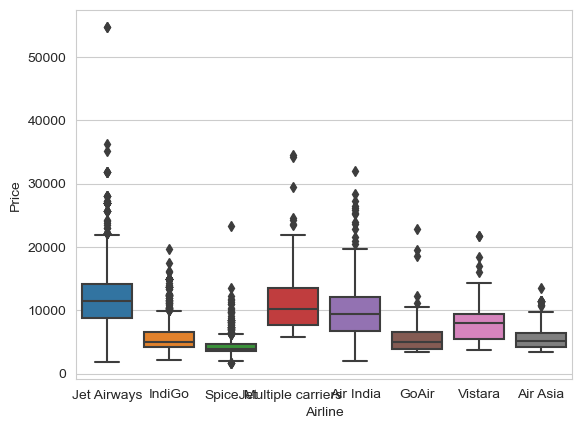

In [9]:
# Code for part 2.1 (continue)

# strategies for remaining missing data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check 'Additional_Info' column
print(planes['Additional_Info'].value_counts())

# check 'Price' column
sns.boxplot(data=planes, x='Airline', y='Price')
plt.show()

# we can remove 'Additional_Info' column and impute 'Price' column with subgroup median

In [10]:
# Code for part 2.1 (continue)

# drop 'Additional_Info' column
planes.dropna(subset=['Additional_Info'], inplace=True)

# imputing missing plane prices
airline_prices = planes.groupby('Airline')['Price'].median()

# convert to a dictionary
prices_dict = airline_prices.to_dict()

# map the dictionary to missing values
planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

# check for missing values (again)
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


#### Part 2.2 Converting and analyzing categorical data

* Use *'.select_dtypes('object')'* to preview categorical data
* Use *'.value_counts()'* to look at categorical values and their counts
* Use *'.nunique()'* to count how many unique values are in categorical column
* Use *'.str.contains()'* to search a column for a specific string or multiple strings

In [11]:
# Code for part 2.2

# finding the number of unique values
import pandas as pd

# get the data
planes = pd.read_csv('12_datasets/planes.csv')

# filter the DataFrame for object columns
non_numeric = planes.select_dtypes('object')

# loop through columns
for col in non_numeric.columns:
    print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())


Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  126
Number of unique values in Dep_Time column:  221
Number of unique values in Arrival_Time column:  1334
Number of unique values in Duration column:  367
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  10


0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


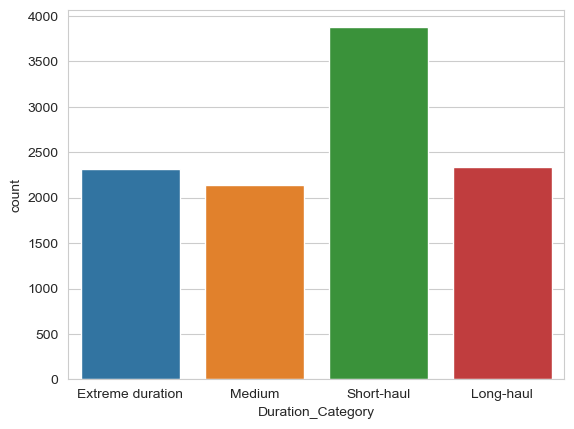

In [12]:
# Code for part 2.2 (continue)

# flight duration categories
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# check column 'duration' values
print(planes['Duration'].head())

# create a list of categories
flight_categories = ['Short-haul', 'Medium', 'Long-haul']

# create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

# create conditions for values in flight_categories to be created
conditions = [
    planes['Duration'].str.contains(short_flights).astype(bool),
    planes['Duration'].str.contains(medium_flights).astype(bool),
    planes['Duration'].str.contains(long_flights).astype(bool)
]

# apply the condition list to the flight categories
planes['Duration_Category'] = np.select(conditions, flight_categories, default='Extreme duration')

# plot the counts of each category
sns.countplot(data=planes, x='Duration_Category')
plt.show()


#### Part 2.3 Working with numeric data

* Common tasks when working with numeric data:
    1. Converting strings to numbers
        * Use *'.str.replace()'* to remove unwanted symbols like commas
        * Use *'.astype()'* to convert column types
        * Use *'.groupby()'* to get summary statistics 
        * Use *'.groupby()'* and *'.transform(lambda x:)'* to add summary statistics into a DataFrame

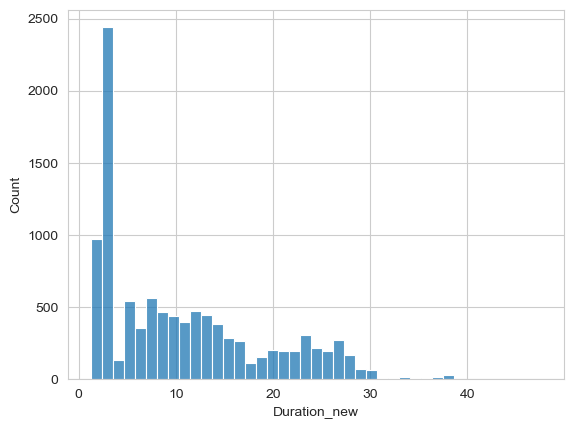

In [13]:
# Part 2.3

# flight duration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get the data
planes = pd.read_csv('12_datasets/planes.csv')
# print(planes.info())

# change the column 'Duration' format to create a new column 'Duration_hour'
def convert_to_hours(duration):
    
    parts = duration.replace('h', '').replace('m', '').split()
    hours = int(parts[0])
    minutes = int(parts[1]) if len(parts) > 1 else 0
    total_hours = hours + minutes/ 60
    return str(total_hours) + 'h'
    
planes['Duration_hour'] = planes['Duration'].apply(lambda x: convert_to_hours(x) if isinstance(x, str) else x)

# remove the string character
planes['Duration_new'] = planes['Duration_hour'].str.replace("h", "")

# convert to float data type
planes['Duration_new'] = planes['Duration_new'].astype(float)

# plot a histogram
sns.histplot(data=planes, x='Duration_new')
plt.show()

In [14]:
# Part 2.3 (continue)

# adding descriptive statistics

# price standard deviation by Airline
planes['airline_price_st_dev'] = planes.groupby('Airline')['Price'].transform(lambda x: x.std())
print(planes[['Airline', 'airline_price_st_dev']].value_counts())

# median duration by airline
planes['airline_median_duration'] = planes.groupby('Airline')['Duration_new'].transform(lambda x: x.median())
print(planes[['Airline', 'airline_median_duration']].value_counts())

# mean price by destination
planes['price_destination_mean'] = planes.groupby('Destination')['Price'].transform(lambda x: x.mean())
print(planes[['Destination', 'price_destination_mean']].value_counts())

Airline            airline_price_st_dev
Jet Airways        4230.748840             3685
IndiGo             2266.753552             1981
Air India          3865.871975             1686
Multiple carriers  3763.674706             1148
SpiceJet           1790.851944              787
Vistara            2864.267802              455
Air Asia           2016.738954              309
GoAir              2790.815129              182
Name: count, dtype: int64
Airline            airline_median_duration
Jet Airways        13.333333                  3685
IndiGo             2.916667                   1981
Air India          15.916667                  1686
Multiple carriers  10.250000                  1148
SpiceJet           2.500000                    787
Vistara            3.166667                    455
Air Asia           2.833333                    309
GoAir              5.166667                    182
Name: count, dtype: int64
Destination  price_destination_mean
Cochin       10506.993486            

#### Part 2.4 Handling outliers

* An outlier is an observation that is **far away** from other data points
* *'.describe()'* is the starting place to identify outliers
* *.boxplot()* and *IQR(interquartile range)* can identify outliers as well
* Use *'.quantile()'* to calculate percentile
    * IQR = 75th – 25th percentile
    * Upper outliers > 75th percentile + 1.5 * IQR
    * Lower outliers < 25th percentile - 1.5 * IQR
        
**Why looking for outliers?**
* Outliers are extreme values, may not accurately represent the data
* Can change the mean and standard deviation
* Statistical tests and machine learning models need normally distributed data

**Questions to ask:**
* Why do they exist?
* Is the data accurate?

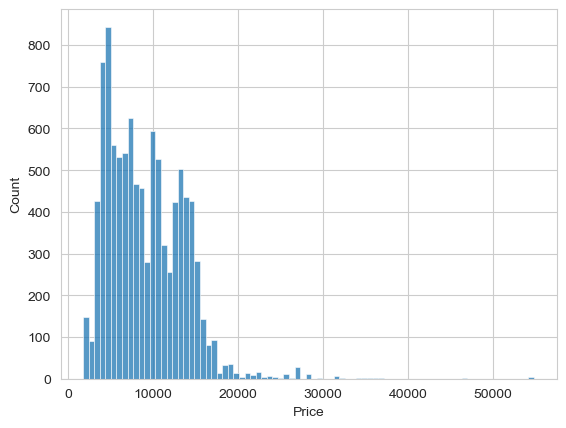

count    10446.000000
mean        10.724288
std          8.471857
min          1.250000
25%          2.833333
50%          8.666667
75%         15.500000
max         47.666667
Name: Duration_new, dtype: float64


In [15]:
# Code for part 2.4

# identifying outliers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get the data
# planes = pd.read_csv('12_datasets/planes.csv')

# plot a histogram of flight prices
sns.histplot(data=planes, x='Price')
plt.show()

# descriptive statistics for flight duration
print(planes['Duration_new'].describe())

In [16]:
# Code for part 2.4

# removing outliers

# find the 75th and 25th percentile
price_seventy_fifth = planes['Price'].quantile(0.75)
price_twenty_fifth = planes['Price'].quantile(0.25)

# calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# calculate the threshold
upper = price_seventy_fifth + 1.5 * prices_iqr
lower = price_twenty_fifth - 1.5 * prices_iqr

# subset the data
planes = planes[(planes['Price'] < upper) & (planes['Price'] > lower)]
print(planes["Price"].describe())

count     9959.000000
mean      8875.160860
std       4057.202002
min       1759.000000
25%       5228.000000
50%       8283.000000
75%      12284.000000
max      23001.000000
Name: Price, dtype: float64


### CHAPTER 3. Relationships in Data

#### Part 3.1 Patterns over time

* Data might include **dates or time values**
* These data might be imported as *'object'* rather than *'DateTime'*
* Use *'pd.read_csv(file, parse_dates=[col_name])'* to parse column as DateTime
* Use *'pd.to_datetime()'* to convert to DateTime data
* Use *'dt.month'*, *'dt.day'*, *'dt.year'* and so on to extract parts of date
* Use *'sns.lineplot()'* to visualzie patterns over time

In [17]:
# Code for part 3.1

# importing DateTime data
import pandas as pd

# get the data
divorce = pd.read_csv('12_datasets/divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

# updating data type to DateTime
divorce['marriage_date'] = pd.to_datetime(divorce['marriage_date'])

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


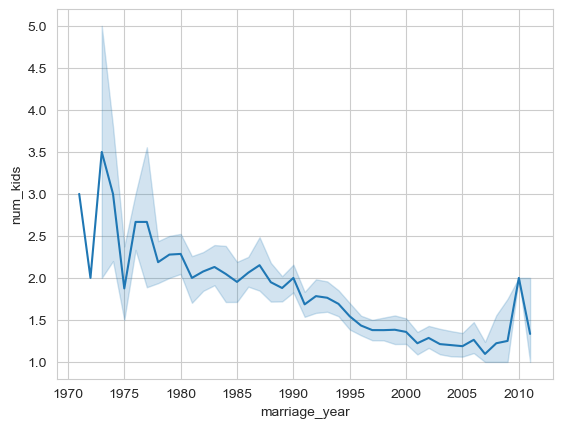

In [18]:
# Code for part 3.1 (continue)

# visualizing relationships over time
import seaborn as sns
import matplotlib.pyplot as plt

# define 'marriage_year' column
divorce['marriage_year'] = divorce['marriage_date'].dt.year

# create a lineplot
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()


#### Part 3.2 Correlation

* Describes **direction and strength** of relationship between two variables
* Can help us use variables to predict future outcomes
* Use *'.corr()'* to calculate correlation
* Use *'sns.heatmap()'* to create a correlation heatmap
* Remember to visualize relationships with *'sns.scatterplot()'* because sometimes they are non-linear
* Use *'sns.pairplot()'* to plot all pairwise relationships between numerical variables in one visualization

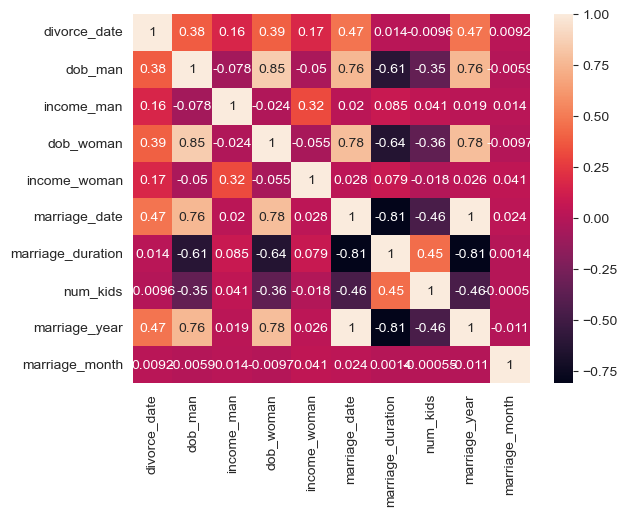

In [19]:
# Code for part 3.2

# interpreting a heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get the data
divorce = pd.read_csv('12_datasets/divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
# print(divorce.info())

# get marriage_month and year
divorce['marriage_year'] = divorce['marriage_date'].dt.year
divorce['marriage_month'] = divorce['marriage_date'].dt.month

# keep numeric columns only
divorce_num = divorce.drop(['education_man', 'education_woman'], axis=1)

# create heatmap of correlation
sns.heatmap(divorce_num.corr(), annot=True)
plt.show()


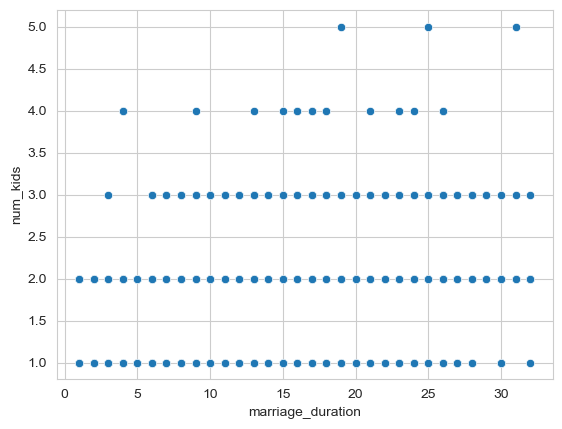

In [20]:
# Code for part 3.2 (continue)

# visualizing variable relationships of 'num_kids' and 'marriage_duration'
import seaborn as sns
import matplotlib.pyplot as plt

# screate the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()


E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


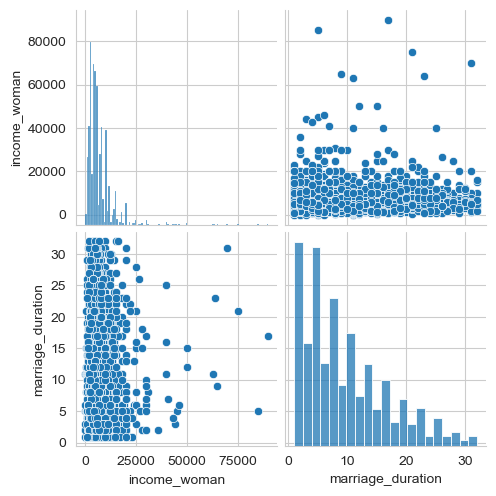

In [21]:
# Code for part 3.2 (continue)

# visualizing multiple variable relationships
import seaborn as sns
import matplotlib.pyplot as plt

# create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman', 'marriage_duration'])
plt.show()


#### Part 3.3 Factor relationships and distributions

* Categorical variables also have relationships
* The common way to display categorical variable is adding color/ hue 
* Use *'sns.kdeplot()'* to plot relationship of categorical variable and numeric variable by adding *'hue='* parameter

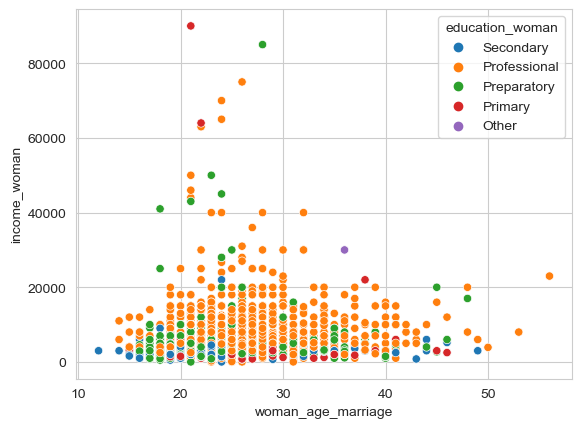

In [22]:
# Code for part 3.3

# categorical data in scatter plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get the data
divorce = pd.read_csv('12_datasets/divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
# print(divorce.head())

# create new columns
divorce['marriage_year'] = divorce['marriage_date'].dt.year
divorce['marriage_month'] = divorce['marriage_date'].dt.month
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year

# create the scatter plot of 'woman_age_marriage' and 'income_woman'
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()


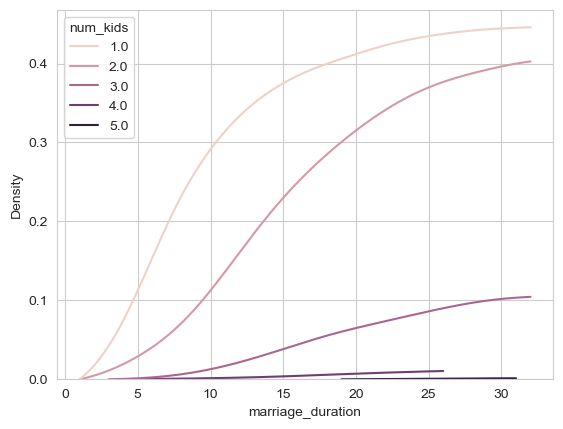

In [23]:
# Code for part 3.3 (continue)

# exploring with KDE plots
import seaborn as sns
import matplotlib.pyplot as plt

# create the KDE plot of 'marriage_duration' and 'num_kids'
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids', cut=0, cumulative=True)
plt.show()


### CHAPTER 4. Turning Exploratory Analysis into Action

#### Part 4.1 Considerations for categorical data

**Why perform EDA?**
* Detecting patterns and relations
* Generating questions, or hypothesis 
* Preparing data for machine learning
* The sample must be representative of the population we wish to study

**Considerations:**
* *Representation of classes*: pay attention to class imbalance (one class occure more frequently in the population)
* Use *'.value_counts(normalize=True)'* to check class frequency
* Use *'pd.crosstab()'* to check class frequency with cross-tabulation


In [24]:
# Code for part 4.1

# checking for class imbalance
import pandas as pd

# get the data
salaries = pd.read_csv('12_datasets/ds_salaries_clean.csv')
print(salaries.info())

# create 'Job_Category' column (check slides from part 2.2)
    # create a list of categories
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning","Managerial", "Consultant"]
    # create values 
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"
    # create conditions
conditions = [    
    (salaries["Designation"].str.contains(data_science)),    
    (salaries["Designation"].str.contains(data_analyst)),    
    (salaries["Designation"].str.contains(data_engineer)),    
    (salaries["Designation"].str.contains(ml_engineer)),    
    (salaries["Designation"].str.contains(manager)),    (salaries["Designation"].str.contains(consultant))
]
    # create column
salaries["Job_Category"] = np.select(conditions,                                       
                                     job_categories, 
                                     default="Other")

print(salaries['Job_Category'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB
None
Job_Category
Data Engineering    0.288303
Data Science        0.263591
Data Analytics      0.222405
Machine Learning    0.118616
Other               0.049423
Managerial          0.046129
Consultant          0.011532
Name: proportion, dtype: float64


In [25]:
# Code for part 4.1

# cross-tabulation
import pandas as pd

# cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries['Company_Size'], salaries['Experience']))

# cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries['Job_Category'], salaries['Company_Size']))

# cross-tabulate Job_Category and Company_Size (update mean 'Salary_USD')
print(pd.crosstab(salaries['Job_Category'], salaries['Company_Size'], values=salaries['Salary_USD'], aggfunc="mean"))


Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22
Company_Size       L    M   S
Job_Category                 
Consultant         3    1   3
Data Analytics    32   91  12
Data Engineering  54  107  14
Data Science      56   81  23
Machine Learning  25   25  22
Managerial        14   11   3
Other             14   10   6
Company_Size                  L              M             S
Job_Category                                                
Consultant         77553.000000    5449.000000  75296.333333
Data Analytics    102997.125000   98125.835165  43074.500000
Data Engineering  113829.888889  116668.971963  85645.285714
Data Science      107865.303571  121664.888889  70426.869565
Machine Learning  123878.520000  100849.480000  85124.954545
Managerial        170102.857143  160419.454545  98976.333333
Other              963

#### Part 4.2 Generating new features

* Sometimes, the format of our data can limit our ability to detect relationships or inhibit the potential performance of machine learning models
* One approach is to **generate new features**
* We can view data types and change them to correct data types (e.g:string -> numeric)
* We can extract datetime elements from datetime data (e.g: month, weekday)
* We can group numeric data to generate new categories by *'pd.cut()'*

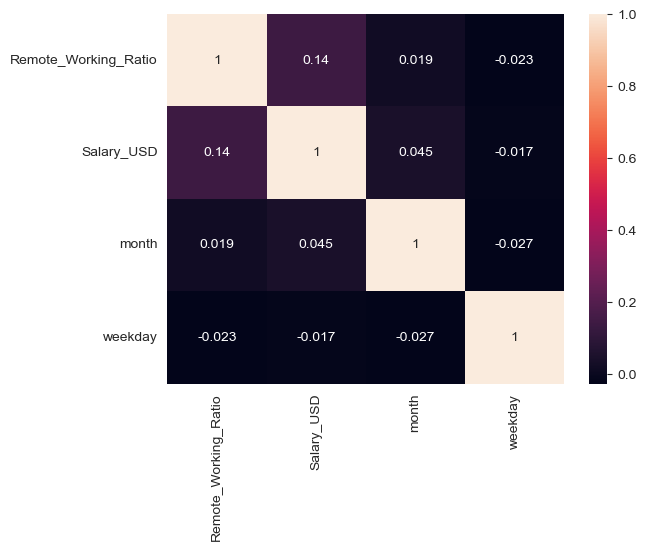

In [30]:
# Code for part 4.2

# extracting features for correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# we use the data from above exercise and get new column
salaries = salaries.iloc[:407]
salaries['date_of_response'] = ['2020-01-07', '2020-09-19', '2020-11-21', '2020-11-29', '2020-09-07', '2020-08-04', '2020-05-27', '2020-10-13', '2020-05-23', '2020-10-15', '2020-11-07', '2020-08-15', '2020-03-16', '2020-10-08', '2020-05-02', '2020-05-24', '2020-04-19', '2020-05-11', '2020-09-25', '2020-04-26', '2020-08-20', '2020-07-10', '2020-11-15', '2020-10-09', '2020-08-24', '2020-02-21', '2020-02-04', '2020-04-10', '2020-11-17', '2020-07-08', '2020-11-21', '2020-01-09', '2020-06-19', '2020-04-05', '2020-11-23', '2020-01-05', '2020-01-25', '2020-10-20', '2020-08-01', '2020-10-25', '2020-03-26', '2020-10-13', '2020-03-10', '2020-11-24', '2020-11-07', '2020-07-03', '2021-04-19', '2021-05-30', '2021-05-23', '2021-09-04', '2021-07-06', '2021-09-30', '2021-01-15', '2021-01-24', '2021-09-05', '2021-01-13', '2021-01-29', '2021-08-28', '2021-10-20', '2021-07-08', '2021-10-13', '2021-03-25', '2021-04-28', '2021-01-25', '2021-10-09', '2021-08-02', '2021-09-21', '2021-11-24', '2021-07-19', '2021-01-29', '2021-07-24', '2021-01-08', '2021-06-08', '2021-09-05', '2021-04-22', '2021-07-19', '2021-09-24', '2021-02-21', '2021-10-25', '2021-01-04', '2021-06-18', '2021-06-07', '2021-08-26', '2021-11-12', '2021-02-24', '2021-03-14', '2021-04-01', '2021-07-26', '2021-07-20', '2021-07-09', '2021-08-26', '2021-11-30', '2021-07-14', '2021-03-26', '2021-04-25', '2021-06-25', '2021-01-24', '2021-08-23', '2021-04-11', '2021-04-11', '2021-04-15', '2021-05-30', '2021-10-17', '2021-04-08', '2021-03-09', '2021-09-01', '2021-09-15', '2021-11-20', '2021-06-01', '2021-03-18', '2021-01-26', '2021-06-06', '2021-04-30', '2021-08-01', '2021-07-28', '2021-10-02', '2021-11-05', '2021-02-04', '2021-10-04', '2021-09-04', '2021-08-09', '2021-08-13', '2021-03-15', '2021-10-05', '2021-07-13', '2021-06-08', '2021-11-17', '2021-05-20', '2021-06-21', '2021-08-21', '2021-02-09', '2021-04-29', '2021-04-22', '2021-04-30', '2021-07-23', '2021-09-02', '2021-11-11', '2021-03-20', '2021-06-01', '2021-06-27', '2021-08-07', '2021-05-23', '2021-07-01', '2021-07-13', '2021-07-18', '2021-01-20', '2021-08-26', '2021-03-25', '2021-05-09', '2021-02-15', '2021-09-18', '2021-07-07', '2021-08-11', '2021-02-25', '2021-03-11', '2021-02-07', '2021-09-15', '2021-03-05', '2021-06-26', '2021-10-26', '2021-03-17', '2021-01-19', '2021-02-18', '2021-05-18', '2021-05-05', '2021-09-16', '2021-07-25', '2021-10-28', '2021-07-18', '2021-09-18', '2021-07-07', '2021-11-29', '2021-09-02', '2021-05-10', '2021-01-05', '2021-10-23', '2021-08-17', '2021-04-29', '2021-02-03', '2021-02-07', '2021-08-29', '2021-09-20', '2021-03-05', '2021-08-14', '2021-02-07', '2021-04-13', '2021-04-16', '2021-03-18', '2022-07-19', '2022-11-05', '2022-06-18', '2022-08-23', '2022-06-27', '2022-04-12', '2022-04-16', '2022-06-23', '2022-10-03', '2022-08-29', '2022-10-07', '2022-04-08', '2022-01-16', '2022-03-01', '2022-11-17', '2022-03-08', '2022-02-23', '2022-07-06', '2022-06-05', '2022-04-22', '2022-10-06', '2022-07-01', '2022-09-04', '2022-02-17', '2022-09-17', '2022-01-16', '2022-01-15', '2022-07-07', '2022-08-08', '2022-08-06', '2022-08-18', '2022-03-17', '2022-09-28', '2022-02-07', '2022-06-12', '2022-06-13', '2022-11-15', '2022-06-30', '2022-02-14', '2022-04-09', '2022-11-18', '2022-09-29', '2022-06-24', '2022-02-12', '2022-04-20', '2022-08-20', '2022-09-18', '2022-04-20', '2022-01-11', '2022-08-02', '2022-04-14', '2022-02-15', '2022-06-25', '2022-10-14', '2022-09-02', '2022-03-02', '2022-02-20', '2022-07-24', '2022-07-27', '2022-03-30', '2022-07-15', '2022-07-19', '2022-01-28', '2022-05-12', '2022-07-23', '2022-07-20', '2022-05-14', '2022-05-21', '2022-07-08', '2022-09-07', '2022-03-30', '2022-01-16', '2022-01-19', '2022-01-24', '2022-11-07', '2022-08-25', '2022-04-02', '2022-09-24', '2022-01-16', '2022-04-23', '2022-11-17', '2022-10-27', '2022-03-21', '2022-05-14', '2022-10-28', '2022-10-23', '2022-05-08', '2022-03-10', '2022-09-09', '2022-02-27', '2022-09-07', '2022-04-02', '2022-11-06', '2022-05-01', '2022-07-13', '2022-02-28', '2022-08-08', '2022-08-09', '2022-09-24', '2022-01-15', '2022-01-13', '2022-02-24', '2022-04-30', '2022-09-26', '2022-10-08', '2022-02-21', '2022-06-30', '2022-10-10', '2022-03-20', '2022-10-18', '2022-08-24', '2022-09-24', '2022-02-22', '2022-08-21', '2022-08-23', '2022-05-21', '2022-03-01', '2022-08-02', '2022-08-01', '2022-08-23', '2022-05-02', '2022-09-08', '2022-08-02', '2022-07-01', '2022-06-07', '2022-02-16', '2022-10-18', '2022-10-01', '2022-01-19', '2022-10-16', '2022-08-16', '2022-07-28', '2022-11-03', '2022-08-09', '2022-02-16', '2022-09-01', '2022-08-04', '2022-11-14', '2022-07-26', '2022-07-21', '2022-02-14', '2022-05-21', '2022-03-28', '2022-05-23', '2022-08-23', '2022-09-27', '2022-07-20', '2022-04-25', '2022-10-08', '2022-02-09', '2022-01-14', '2022-05-30', '2022-11-25', '2022-08-19', '2022-08-03', '2022-09-06', '2022-10-28', '2022-07-30', '2022-06-27', '2022-01-23', '2022-01-06', '2022-06-09', '2022-01-15', '2022-08-02', '2022-01-20', '2022-11-02', '2022-11-14', '2022-05-15', '2022-07-18', '2022-10-15', '2022-03-19', '2022-03-08', '2022-11-13', '2022-02-01', '2022-03-20', '2022-07-23', '2022-11-12', '2022-11-06', '2022-03-25', '2022-04-16', '2022-10-11', '2022-04-03', '2022-06-30', '2022-09-03', '2022-10-23', '2022-06-17', '2022-09-07', '2022-08-23', '2022-08-03', '2022-09-21', '2022-09-12', '2022-05-21', '2022-06-10', '2022-01-15', '2022-05-10', '2022-01-05', '2022-03-11', '2022-05-18', '2022-08-03', '2022-07-16', '2022-05-14', '2022-11-04', '2022-08-14', '2022-02-11', '2022-08-19', '2022-08-15', '2022-03-28', '2022-10-16', '2022-01-02', '2022-02-03', '2022-09-21', '2022-10-13', '2022-02-26', '2022-05-10', '2022-10-27', '2022-08-25', '2022-08-11', '2022-06-15', '2022-06-10']

salaries['date_of_response'] = pd.to_datetime(salaries['date_of_response'])
# print(salaries.info())

# get the month of response
salaries['month'] = salaries['date_of_response'].dt.month

# extract the weekday of the response
salaries['weekday'] = salaries['date_of_response'].dt.weekday

# create a heatmap
num_cols = ['Remote_Working_Ratio', 'Salary_USD', 'month', 'weekday']
salaries_num = salaries[num_cols]
sns.heatmap(salaries_num.corr(), annot=True)
plt.show()

# numeric columns donot show correlations, let's try to convert numeric data into classes!

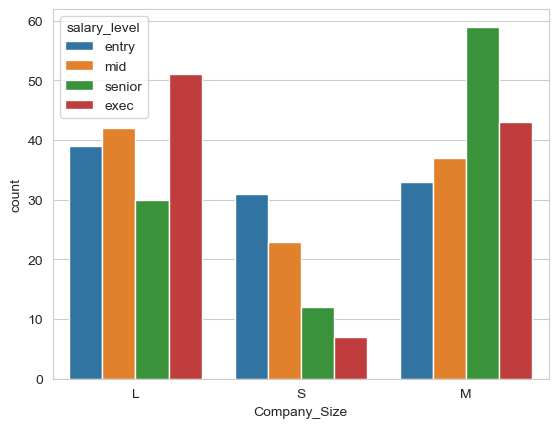

In [32]:
# Code for part 4.2 (continue)

# calculating salary percentiles

# find the 25th percentile
twenty_fifth = salaries['Salary_USD'].quantile(0.25)

# save the median
salaries_median = salaries['Salary_USD'].median()

# find the 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
# print(twenty_fifth, salaries_median, seventy_fifth)

# create salary labels
salary_labels = ['entry', 'mid', 'senior', 'exec']

# create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries['Salary_USD'].max()]

# create salary level
salaries['salary_level'] = pd.cut(salaries['Salary_USD'], bins=salary_ranges, labels=salary_labels)

# plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x='Company_Size', hue='salary_level')
plt.show()

#### Part 4.3 Generating hypothesis

* 